In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL.ImageColor import colormap

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
len(df) # total 150 flower

150

In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='petal_length', ylabel='petal_width'>

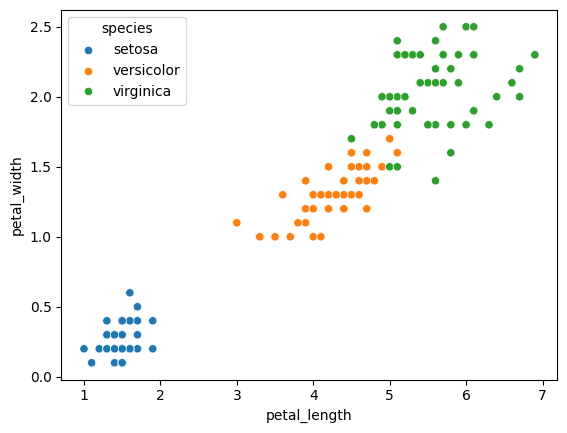

In [8]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

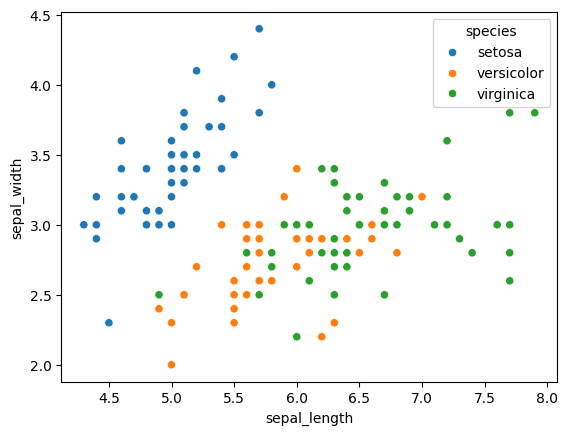

In [9]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')

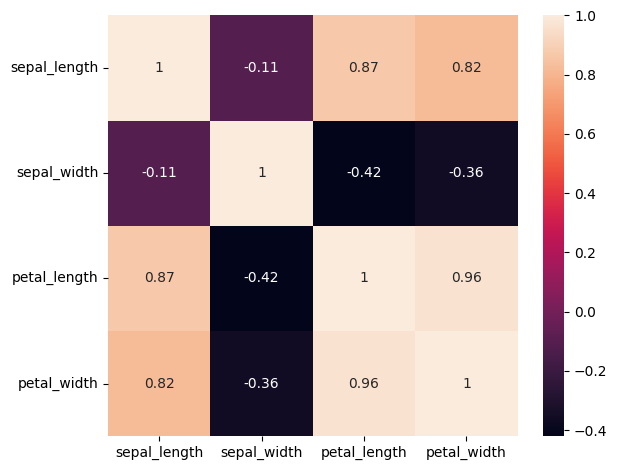

In [18]:
df_corr = df.select_dtypes(include='number').corr()

ax = sns.heatmap(df_corr, annot=True)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()


In [24]:
# splitting x and y
X = df.drop('species', axis=1)
y = df['species']

# splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Create Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000)
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20) # creates 20 numbers from 0 to 1 
C = np.logspace(0, 10, 20) # create 20 numbers from log 0 to log 10

param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}
grid_model = GridSearchCV(estimator=log_model, param_grid=param_grid)

In [25]:
grid_model.fit(scaled_X_train, y_train)

/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1196: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/hala/Desktop/courses/ML learning videos/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. U

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [26]:
grid_model.best_params_

{'C': np.float64(11.28837891684689),
 'l1_ratio': np.float64(0.0),
 'penalty': 'l1'}

Accuracy is: 0.9736842105263158


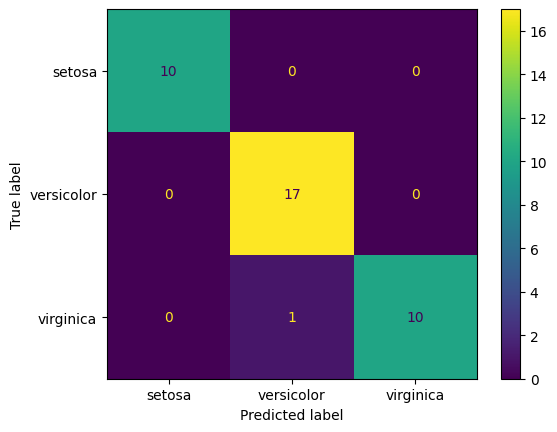

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
y_pred = grid_model.predict(scaled_X_test)
print(f'Accuracy is: {accuracy_score(y_test, y_pred)}')
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test) # only 1 wrong

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

